In [1]:
'''
다 함께 하는 작업 공간이기 때문에 경로나 파일 명 등을 통일 해야 할 것 같습니다.
그렇게 하지 않으면 경로 때문에 매번 새로운 커밋이 생성 됩니다.
'''

import os

# 현재 작업 디렉토리 확인
current_directory = os.getcwd()
print("Current directory:", current_directory)

# 필요한 CSV 파일이 있는 디렉토리로 변경
target_directory = "C:/k-project/raw_datasets/회귀" # 해당 코드 부분의 경로를 동일하게 하거나 / 깃 리파지토리 안에 파일을 집어 넣는 작업 필요.      
os.chdir(target_directory)

import pandas as pd

# CSV 파일 불러오기
csv_filename = "국가별_총에너지_소모량(1980-2021)_회귀_시각화_전처리.csv"  # CSV 파일명. 파일명을 모두 동일하게 해야합니다.
df = pd.read_csv(csv_filename)

# 데이터 확인
print(df.head())


Current directory: c:\k-project\source\소비량
   Unnamed: 0 COUNTRY                                CONSUMPTION  Year  \
0           0   World                     Consumption (quad Btu)  1980   
1           1   World                            Coal (quad Btu)  1980   
2           2   World                     Natural gas (quad Btu)  1980   
3           3   World     Petroleum and other liquids (quad Btu)  1980   
4           4   World  Nuclear, renewables, and other (quad Btu)  1980   

         Value  
0  292.9399154  
1    78.694561  
2   53.8652233  
3  132.0640194  
4  28.27974342  


In [2]:
df.head()

,Unnamed: 0,COUNTRY,CONSUMPTION,Year,Value
0,0,World,Consumption (quad Btu),1980,292.9399154
1,1,World,Coal (quad Btu),1980,78.694561
2,2,World,Natural gas (quad Btu),1980,53.8652233
3,3,World,Petroleum and other liquids (quad Btu),1980,132.0640194
4,4,World,"Nuclear, renewables, and other (quad Btu)",1980,28.27974342


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67620 entries, 0 to 67619
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   67620 non-null  int64 
 1   COUNTRY      67620 non-null  object
 2   CONSUMPTION  67620 non-null  object
 3   Year         67620 non-null  int64 
 4   Value        59985 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.6+ MB


### 1. 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. 에너지 소모량 소모량 회귀, 시각화 전용 csv파일 import

In [2]:
# csv파일 읽기
#df = pd.read_csv('국가별_총에너지_소모량/국가별_총에너지_소모량(1980-2021)_회귀_시각화_전처리.csv')

# 출력
df.head(3)

,Unnamed: 0,COUNTRY,CONSUMPTION,Year,Value
0,0,World,Consumption (quad Btu),1980,292.9399154
1,1,World,Coal (quad Btu),1980,78.694561
2,2,World,Natural gas (quad Btu),1980,53.8652233


### 3. 탐색적 데이터 분석 및 전처리 (시각화 포함)

### (01). 필요없는 열 삭제
해당 열은 앞서 행렬변환 과정에서 index도 같이 포함되어 저장된 것으로 보입니다.

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head(3)

,COUNTRY,CONSUMPTION,Year,Value
0,World,Consumption (quad Btu),1980,292.9399154
1,World,Coal (quad Btu),1980,78.694561
2,World,Natural gas (quad Btu),1980,53.8652233


### (02). 데이터 확인
- 672620개의 행, 4개의 열
- Value값에 약 7000개의 결측치 확인

---------------------------------
#### 변수 설명
- COUNTRY : 국가 이름, 오브젝트
- CONSUMPTION : 소비, 오브젝트
- Year : 년도, 숫자
- Value : 값, 오브젝트


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67620 entries, 0 to 67619
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   COUNTRY      67620 non-null  object
 1   CONSUMPTION  67620 non-null  object
 2   Year         67620 non-null  int64 
 3   Value        59985 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


### (03). 데이터 기초 통계 확인
데이터 확인 시, Value는 Object타입으로 분류되어있어서 describe()으로는 확인 불가능합니다.  
그러므로, float형으로 변환함과 동시에 결측치 처리를 진행합니다.

In [5]:
df.describe()

,Year
count,67620.000000
mean,2000.500000
std,12.121008
min,1980.000000
25%,1990.000000
50%,2000.500000
75%,2011.000000
max,2021.000000


### (04). Value 변수 전처리
- Value열에 결측치가 포함된 행을 df2에 할당하고, 출력

In [6]:
df2 = df[df['Value'].isnull()]
df2

,COUNTRY,CONSUMPTION,Year,Value
12,Afghanistan,Nuclear (quad Btu),1980,NaN
19,Albania,Nuclear (quad Btu),1980,NaN
26,Algeria,Nuclear (quad Btu),1980,NaN
33,American Samoa,Nuclear (quad Btu),1980,NaN
40,Angola,Nuclear (quad Btu),1980,NaN
...,...,...,...,...
67590,Wake Island,Nuclear (quad Btu),2021,NaN
67597,Western Sahara,Nuclear (quad Btu),2021,NaN
67604,Yemen,Nuclear (quad Btu),2021,NaN
67611,Zambia,Nuclear (quad Btu),2021,NaN


- COUNTRY, CONSUMPTION, Year 변수들의 고유한 값과 개수 출력

In [7]:
print("'COUNTRY' 열의 고유한 값의 개수 :", df2['COUNTRY'].value_counts())

'COUNTRY' 열의 고유한 값의 개수 : COUNTRY
Afghanistan          42
Nepal                42
New Caledonia        42
New Zealand          42
Nicaragua            42
                     ..
South Africa          4
Armenia               4
U.S. Territories      4
Brazil                2
Former Yugoslavia     1
Name: count, Length: 201, dtype: int64


In [8]:
print("'COUNTRY' 열의 고유한 값 확인 :\n", df2['COUNTRY'].unique())

'COUNTRY' 열의 고유한 값 확인 :
 ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Burkina Faso' 'Burma'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo-Brazzaville' 'Congo-Kinshasa' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Cuba' 'Cyprus' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eswatini' 'Ethiopia' 'Falkland Islands' 'Faroe Islands' 'Fiji'
 'Former Yugoslavia' 'French Guiana' 'French Polynesia' 'Gabon'
 'Gambia, The' 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Grenada'
 'Guadeloupe' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hawaiian Trade Zone' 'Honduras' 'Hong Kong' 'Iceland' 'Indonesia' 'Iran'
 'Iraq' 'Ire

In [9]:
print("'CONSUMPTION' 열의 고유한 값의 개수 :", df2['CONSUMPTION'].value_counts())

'CONSUMPTION' 열의 고유한 값의 개수 : CONSUMPTION
Nuclear (quad Btu)                        7631
Petroleum and other liquids (quad Btu)       2
Consumption (quad Btu)                       2
Name: count, dtype: int64


In [10]:
print("'CONSUMPTION' 열의 고유한 값 확인 :\n", df2['CONSUMPTION'].unique())

'CONSUMPTION' 열의 고유한 값 확인 :
 ['Nuclear (quad Btu)' 'Petroleum and other liquids (quad Btu)'
 'Consumption (quad Btu)']


In [11]:
print("'Year' 열의 고유한 값의 개수 :", df2['Year'].value_counts())

'Year' 열의 고유한 값의 개수 : Year
2019    192
2020    190
2018    190
2021    189
2014    188
2010    188
2013    188
2012    188
2016    188
2017    188
2011    187
2009    187
2008    187
2007    187
2006    187
2005    186
2004    186
2003    186
2015    185
2002    185
2001    185
2000    185
1995    185
1994    185
1999    184
1998    184
1997    184
1993    184
1992    184
1996    183
1980    172
1981    171
1990    170
1989    170
1988    170
1986    170
1983    170
1982    170
1991    170
1987    169
1985    169
1984    169
Name: count, dtype: int64


In [12]:
print("'Year' 열의 고유한 값 확인 :\n", df2['Year'].unique())

'Year' 열의 고유한 값 확인 :
 [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


- 위 결과들을 확인한 결과 CONSUMPTION 변수의 Nuclear(원자력) 데이터 확인 필요

### (05). CONSUMPTION 변수의 원자력 결측치 탐색적 데이터 분석


In [13]:
# df2 = 결측치만 집계한 값
df3 = df2[df2['CONSUMPTION'] == 'Nuclear (quad Btu)']
df4 = df3.groupby(['COUNTRY']).size().reset_index(name='Count')
# df4의 값들은 결측치가 많을수록 원자력 에너지 소모량의 년도의 결측치가 많은 것.
df4

,COUNTRY,Count
0,Afghanistan,42
1,Albania,42
2,Algeria,42
3,American Samoa,42
4,Angola,42
...,...,...
196,Wake Island,42
197,Western Sahara,42
198,Yemen,42
199,Zambia,42


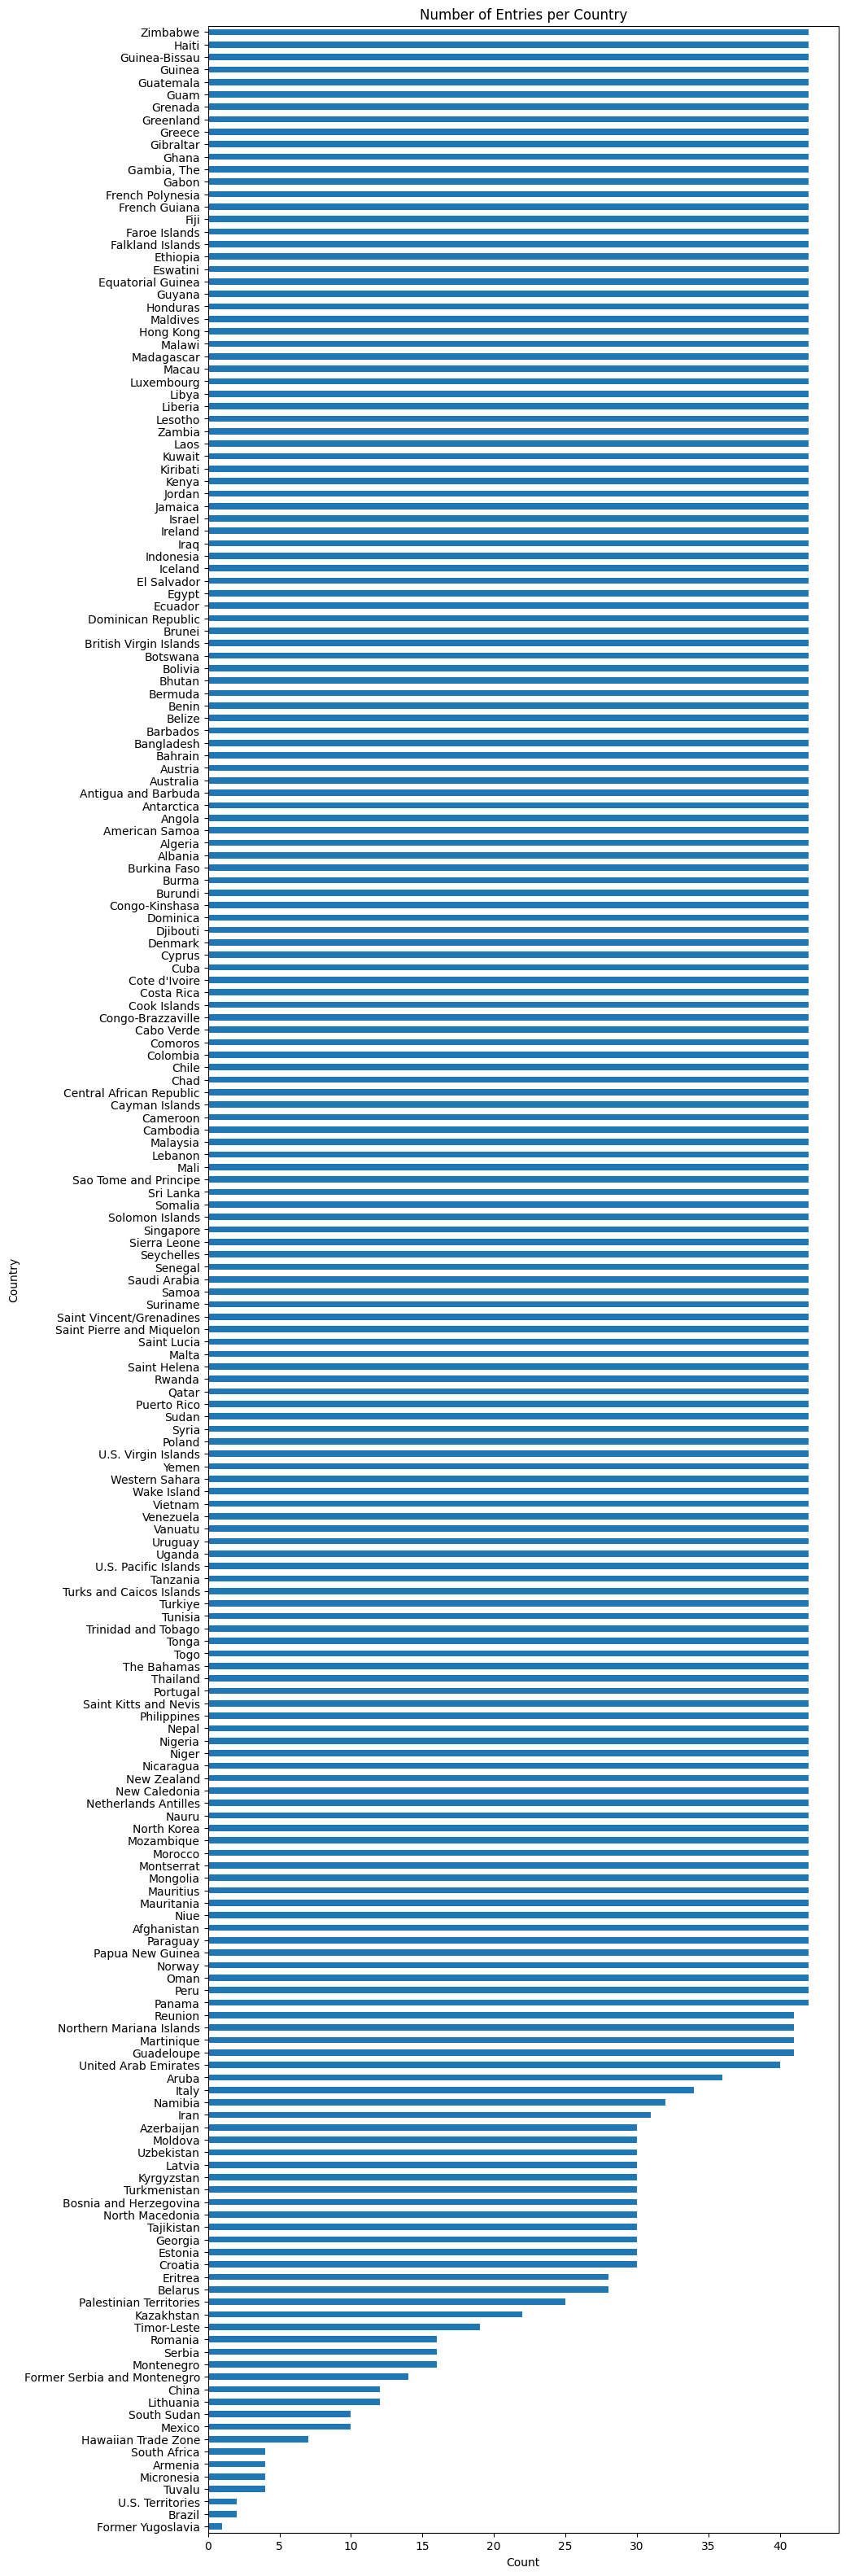

In [14]:
# COUNTRY를 인덱스로 설정하고 Count 값을 이용해 막대 그래프 생성
df4.set_index('COUNTRY')['Count'].sort_values().plot(kind='barh', figsize=(10, 40))
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Number of Entries per Country')
plt.show()

# 막대 그래프의 길이가 길수록 원자력 에너지 소모량 년도의 결측치가 많은 것.

- 해당 그래프 확인시, x축(count)이 42이상인 값들은 1980년부터 2021년까지 즉, 원자력을 사용하지 않는 국가입니다.
- 그래서, count가 42미만이라면, 과거에 원자력을 사용하다가 폐지하거나 최근 원자력을 사용하기 시작했다는 것이므로 따로 분석합니다.
- 또한, 이 분석으로 의도치않게 누락된 값인지 확인 가능합니다.

In [15]:
# df4에서 42 미만인 값들을 df5에 할당
df5 = df4[df4['Count'] < 42]

In [16]:
# df5에만 있는 'COUNTRY' 데이터를 찾음
unique_countries = set(df5['COUNTRY']) - set(df3['COUNTRY'])

unique_countries

set()

In [17]:
# df5와 df3에 모두 있는 'COUNTRY' 데이터를 찾음
common_countries = set(df5['COUNTRY']).intersection(set(df3['COUNTRY']))

# 이들 중 df3에서 해당하는 행들을 선택
df6 = df3[df3['COUNTRY'].isin(common_countries)]
df6

,COUNTRY,CONSUMPTION,Year,Value
187,Brazil,Nuclear (quad Btu),1980,NaN
292,China,Nuclear (quad Btu),1980,NaN
509,Former Yugoslavia,Nuclear (quad Btu),1980,NaN
614,Guadeloupe,Nuclear (quad Btu),1980,NaN
663,Hawaiian Trade Zone,Nuclear (quad Btu),1980,NaN
...,...,...,...,...
67436,Timor-Leste,Nuclear (quad Btu),2021,NaN
67478,Turkmenistan,Nuclear (quad Btu),2021,NaN
67492,Tuvalu,Nuclear (quad Btu),2021,NaN
67506,U.S. Territories,Nuclear (quad Btu),2021,NaN


In [18]:
df7 = df6
df7['Value'] = df7['Value'].fillna(0)

C:\Users\thesw\AppData\Local\Temp\ipykernel_17564\1271432246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Value'] = df7['Value'].fillna(0)


In [19]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 187 to 67562
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   COUNTRY      953 non-null    object
 1   CONSUMPTION  953 non-null    object
 2   Year         953 non-null    int64 
 3   Value        953 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 37.2+ KB


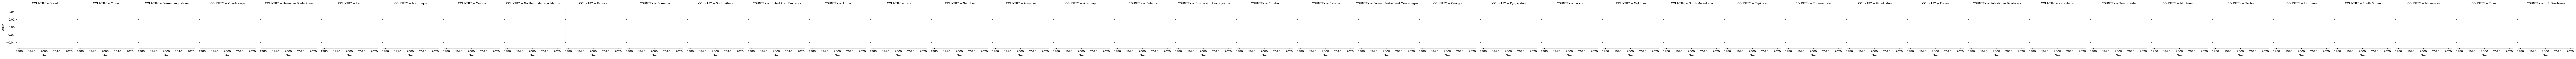

In [20]:
# 원자력 데이터 결측치가 42미만인 데이터 시각화
# 모든 데이터에 결측치가 존재하는 것이 아닌, 결측치가 42미만이라면, 
#       과거에 원자력을 사용하다가 폐지하거나 최근 원자력을 사용하기 시작했다는 것이므로 따로 분석합니다.
# (결측치가 아닌, 0으로 표기한 값이 있을수도 있기때문에 이 그래프만 보고 해당되는 년도들에서만 원자력을 사용하지 않다고 생각하는 것은 안됨.)
# 또한, 이 분석으로 의도치않게 누락된 값인지 확인 가능
# => ex. A라는 국가가 2003~2021년까지 원자력을 사용했는데, 2010년에 NaN으로 나와있는 경우.
g = sns.FacetGrid(df7, col="COUNTRY", col_wrap=42)
g.map(sns.lineplot,'Year', 'Value')

- 파란색 선이 존재하는 값들은 그 년도에 원자력 발전이 결측치
- col_wrap값을 국가 숫자대로 설정해야 y축이 누락안됨.
- Former Yugoslavia는 1980년 하나만 있어서 그래프에 안그려짐
- 위 42개의 국가 중 Armenia, Former Serbia and Montenegro 등 2개의 국가만 중간에 원자력 발전에 누락값이 있어서 별도로 확인

In [21]:
print(df7.groupby('COUNTRY')['Year'].unique())

COUNTRY
Armenia                                                  [1992, 1993, 1994, 1995]
Aruba                           [1986, 1987, 1988, 1989, 1990, 1991, 1992, 199...
Azerbaijan                      [1992, 1993, 1994, 1995, 1996, 1997, 1998, 199...
Belarus                         [1992, 1993, 1994, 1995, 1996, 1997, 1998, 199...
Bosnia and Herzegovina          [1992, 1993, 1994, 1995, 1996, 1997, 1998, 199...
Brazil                                                               [1980, 1981]
China                           [1980, 1981, 1982, 1983, 1984, 1985, 1986, 198...
Croatia                         [1992, 1993, 1994, 1995, 1996, 1997, 1998, 199...
Eritrea                         [1994, 1995, 1996, 1997, 1998, 1999, 2000, 200...
Estonia                         [1992, 1993, 1994, 1995, 1996, 1997, 1998, 199...
Former Serbia and Montenegro    [1992, 1993, 1994, 1995, 1996, 1997, 1998, 199...
Former Yugoslavia                                                          [1980]
Georgia 

In [22]:
df_ar = df[(df['CONSUMPTION'] == 'Nuclear (quad Btu)') & (df['COUNTRY'] == 'Armenia')]
df_ar

,COUNTRY,CONSUMPTION,Year,Value
68,Armenia,Nuclear (quad Btu),1980,--
1678,Armenia,Nuclear (quad Btu),1981,--
3288,Armenia,Nuclear (quad Btu),1982,--
4898,Armenia,Nuclear (quad Btu),1983,--
6508,Armenia,Nuclear (quad Btu),1984,--
8118,Armenia,Nuclear (quad Btu),1985,--
9728,Armenia,Nuclear (quad Btu),1986,--
11338,Armenia,Nuclear (quad Btu),1987,--
12948,Armenia,Nuclear (quad Btu),1988,--
14558,Armenia,Nuclear (quad Btu),1989,--


In [23]:
df_fo = df[(df['CONSUMPTION'] == 'Nuclear (quad Btu)') & (df['COUNTRY'] == 'Former Serbia and Montenegro')]
df_fo

,COUNTRY,CONSUMPTION,Year,Value
495,Former Serbia and Montenegro,Nuclear (quad Btu),1980,--
2105,Former Serbia and Montenegro,Nuclear (quad Btu),1981,--
3715,Former Serbia and Montenegro,Nuclear (quad Btu),1982,--
5325,Former Serbia and Montenegro,Nuclear (quad Btu),1983,--
6935,Former Serbia and Montenegro,Nuclear (quad Btu),1984,--
8545,Former Serbia and Montenegro,Nuclear (quad Btu),1985,--
10155,Former Serbia and Montenegro,Nuclear (quad Btu),1986,--
11765,Former Serbia and Montenegro,Nuclear (quad Btu),1987,--
13375,Former Serbia and Montenegro,Nuclear (quad Btu),1988,--
14985,Former Serbia and Montenegro,Nuclear (quad Btu),1989,--


- Armenia, Former Serbia and Montenegro 2개의 국가 확인 결과, 중간에 특정한 년도만 누락된 것이 아니라 결측치 값들을 '--'이라는 문자열로 대체
- 각주 확인결과 '--'은 해당없음으로 원자력 발전이 0이 맞으므로 --과 NaN 데이터는 모두 0으로 처리


In [24]:
df8 = df[df['Value'].isna()]
df8.shape

(7635, 4)

In [25]:
print(df8['CONSUMPTION'].value_counts())

CONSUMPTION
Nuclear (quad Btu)                        7631
Petroleum and other liquids (quad Btu)       2
Consumption (quad Btu)                       2
Name: count, dtype: int64


- 결측치 대체 전에 아직 확인안한 Petroleum and other liquids (quad Btu), Consumption (quad Btu) 2개의 데이터 유형 확인

In [26]:
df_other = df[(df['CONSUMPTION'] == 'Consumption (quad Btu)') & df['Value'].isna()]
df_other

,COUNTRY,CONSUMPTION,Year,Value
65891,U.S. Territories,Consumption (quad Btu),2020,NaN
67501,U.S. Territories,Consumption (quad Btu),2021,NaN


In [27]:
df_other2 = df[(df['CONSUMPTION'] == 'Petroleum and other liquids (quad Btu)') & df['Value'].isna()]
df_other2

,COUNTRY,CONSUMPTION,Year,Value
63864,Northern Mariana Islands,Petroleum and other liquids (quad Btu),2019,NaN
64270,Tuvalu,Petroleum and other liquids (quad Btu),2019,NaN


In [28]:
df_other3 = df[(df['COUNTRY'] == 'U.S. Territories') & (df['CONSUMPTION'] == 'Consumption (quad Btu)')]
df_other3

,COUNTRY,CONSUMPTION,Year,Value
1491,U.S. Territories,Consumption (quad Btu),1980,0
3101,U.S. Territories,Consumption (quad Btu),1981,0
4711,U.S. Territories,Consumption (quad Btu),1982,0
6321,U.S. Territories,Consumption (quad Btu),1983,0
7931,U.S. Territories,Consumption (quad Btu),1984,0
9541,U.S. Territories,Consumption (quad Btu),1985,0
11151,U.S. Territories,Consumption (quad Btu),1986,0
12761,U.S. Territories,Consumption (quad Btu),1987,0
14371,U.S. Territories,Consumption (quad Btu),1988,0
15981,U.S. Territories,Consumption (quad Btu),1989,0


- U.S. Territories(미국의 해외영토) 엑셀파일 확인결과 Consumption이 아닌 다른 데이터도 전부 0으로 집계되있음으로 확인

In [29]:
df_other4 = df[(df['COUNTRY'] == 'Northern Mariana Islands') & (df['CONSUMPTION'] == 'Petroleum and other liquids (quad Btu)')]
df_other4

,COUNTRY,CONSUMPTION,Year,Value
1074,Northern Mariana Islands,Petroleum and other liquids (quad Btu),1980,0
2684,Northern Mariana Islands,Petroleum and other liquids (quad Btu),1981,0
4294,Northern Mariana Islands,Petroleum and other liquids (quad Btu),1982,0
5904,Northern Mariana Islands,Petroleum and other liquids (quad Btu),1983,0
7514,Northern Mariana Islands,Petroleum and other liquids (quad Btu),1984,0
9124,Northern Mariana Islands,Petroleum and other liquids (quad Btu),1985,0
10734,Northern Mariana Islands,Petroleum and other liquids (quad Btu),1986,0
12344,Northern Mariana Islands,Petroleum and other liquids (quad Btu),1987,0
13954,Northern Mariana Islands,Petroleum and other liquids (quad Btu),1988,0
15564,Northern Mariana Islands,Petroleum and other liquids (quad Btu),1989,0


- Northern Mariana Islands의 Petroleum and other liquids(석유 및 기타 액체)의 NaN값은 다른 년도의 모든 값이 0이므로 0으로 처리

In [30]:
df_other4 = df[(df['COUNTRY'] == 'Tuvalu') & (df['CONSUMPTION'] == 'Petroleum and other liquids (quad Btu)')]
df_other4

,COUNTRY,CONSUMPTION,Year,Value
1480,Tuvalu,Petroleum and other liquids (quad Btu),1980,0
3090,Tuvalu,Petroleum and other liquids (quad Btu),1981,0
4700,Tuvalu,Petroleum and other liquids (quad Btu),1982,0
6310,Tuvalu,Petroleum and other liquids (quad Btu),1983,0
7920,Tuvalu,Petroleum and other liquids (quad Btu),1984,0
9530,Tuvalu,Petroleum and other liquids (quad Btu),1985,0
11140,Tuvalu,Petroleum and other liquids (quad Btu),1986,0
12750,Tuvalu,Petroleum and other liquids (quad Btu),1987,0
14360,Tuvalu,Petroleum and other liquids (quad Btu),1988,0
15970,Tuvalu,Petroleum and other liquids (quad Btu),1989,0


Tuvalu는 작은 영토를 보유한 섬나라이며, 2018년까지도 석유 및 기타 연료의 소비량이 없으므로 이 섬 또한 결측치 값을 0으로 대체

### (06). 결측치 0으로 대체

In [31]:
df = df.fillna(0)
df

,COUNTRY,CONSUMPTION,Year,Value
0,World,Consumption (quad Btu),1980,292.9399154
1,World,Coal (quad Btu),1980,78.694561
2,World,Natural gas (quad Btu),1980,53.8652233
3,World,Petroleum and other liquids (quad Btu),1980,132.0640194
4,World,"Nuclear, renewables, and other (quad Btu)",1980,28.27974342
...,...,...,...,...
67615,Zimbabwe,Natural gas (quad Btu),2021,0
67616,Zimbabwe,Petroleum and other liquids (quad Btu),2021,0.055915186
67617,Zimbabwe,"Nuclear, renewables, and other (quad Btu)",2021,0.037381368
67618,Zimbabwe,Nuclear (quad Btu),2021,0
